# 1. Conexión al Drive

In [ ]:

try:
  from google.colab import drive
  drive.mount('/content/drive')
  print("Drive montado correctamente.")
except ModuleNotFoundError:
  print("No estás en Colab, omitiendo montaje de Drive.")

Mounted at /content/drive
Drive montado correctamente.


# 2. Cargar funciones auxiliares desde otro notebook

In [ ]:
%run "/content/drive/MyDrive/UdeA/Salud/funciones.py"

# 3. Librerias

In [ ]:
# --- Importar Librerias ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from IPython.display import display
import scipy.stats as stats

# 4. Carga del dataset desde archivo CSV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UdeA/Salud/data/mental_health_dataset.csv')
print("Archivo cargado correctamente")

Archivo cargado correctamente


# 5. Cargar datos

In [ ]:
def cargar_datos():

  """
    Carga un archivo CSV y retorna un DataFrame.
    Args:
        ruta (str): Ruta al archivo CSV.
    Returns:
        DataFrame de pandas.
  """

  # Crear carpeta dentro de Drive para el proyecto (si no existe)
  project_path = '/content/drive/MyDrive/UdeA/Salud/data'
  os.makedirs(project_path, exist_ok=True)

  # --- 2. Cargar el archivo CSV ----
  # Define la ruta del archivo CSV
  csv_file_path = os.path.join(project_path, 'mental_health_dataset.csv')

  # Carga el archivo CSV en un DataFrame de pandas
  try:
    df = pd.read_csv(csv_file_path)
    print("Archivo CSV cargado correctamente.")
    # Muestra las primeras filas del DataFrame para verificar
  except FileNotFoundError:
    print(f"Error: El archivo CSV no se encontró en la ruta: {csv_file_path}")
  except Exception as e:
    print(f"Ocurrió un error al cargar el archivo CSV: {e}")

In [ ]:
cargar_datos()

Archivo CSV cargado correctamente.


# 6. Analisis Exploratorio

In [ ]:
def analisis_exploratorio(df):

  """
    Muestra resumen básico del DataFrame.
  """

  # --- 3. Análisis Exploratorio ---
  print("\n--- Exploración básica del dataset ---")
  print("Primeras 5 filas:")
  display(df.head())

  print("\nInformación general:")
  df.info()

  print("\nDescripción estadística:")
  display(df.describe())

  print("\nDescripción estadística de variables categóricas:")
  display(df.describe(include='object'))

  print("\nConteo de valores nulos por columna:")
  display(df.isnull().sum())



In [ ]:
analisis_exploratorio(df)



--- Exploración básica del dataset ---
Primeras 5 filas:


,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), in

,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.557600,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,13.749581,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,18.000000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,30.000000,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,41.500000,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,53.000000,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,65.000000,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000



Descripción estadística de variables categóricas:


,gender,employment_status,work_environment,mental_health_history,seeks_treatment,mental_health_risk
count,10000,10000,10000,10000,10000,10000
unique,4,4,3,2,2,3
top,Male,Employed,On-site,No,No,Medium
freq,4557,5868,5044,6969,6012,5892



Conteo de valores nulos por columna:


,0
age,0
gender,0
employment_status,0
work_environment,0
mental_health_history,0
seeks_treatment,0
stress_level,0
sleep_hours,0
physical_activity_days,0
depression_score,0


# 7. Visualización de los datos

## 7.1 Variables Numéricas

### 7.1.1 Histograma

In [ ]:
def visualizar_histograma(df):

  # Selecciona solo las columnas numéricas
  num_cols = df.select_dtypes(include=['int64', 'float64']).columns

  # Verifica si hay columnas numéricas para graficar
  if len(num_cols) > 0:
      print("\n--- Histogramas para variables numéricas ---")
      df[num_cols].hist(bins=20, figsize=(15, 10))  # Ajusta bins y figsize según necesites
      plt.suptitle('Histogramas de Variables Numéricas', y=1.02)
      plt.tight_layout()
      plt.show()
  else:
      print("No hay columnas de tipo int o float para generar histogramas.")



--- Histogramas para variables numéricas ---


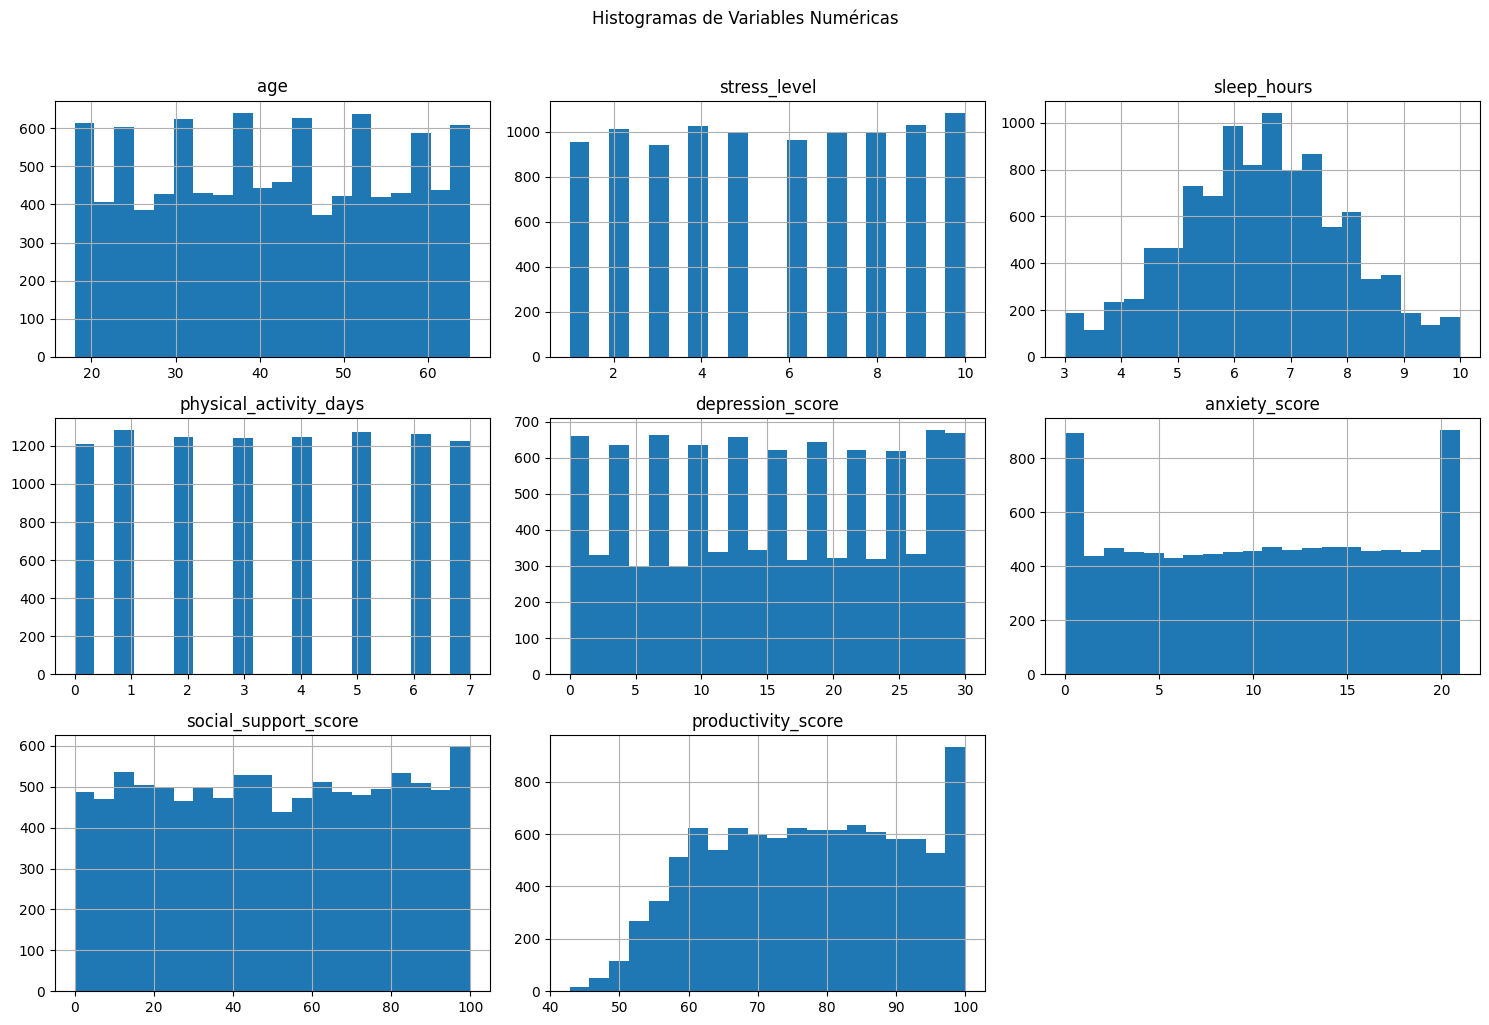

In [ ]:
# Llama a la función de visualización con tu DataFrame
visualizar_histograma(df)

### 7.1.2 Outliers en variables numéricas

In [ ]:
def visualizar_boxplots(df):
    """
    Muestra boxplots para identificar outliers en variables numéricas.
    """
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(num_cols) > 0:
        num_vars = len(num_cols)
        cols = 3
        rows = (num_vars // cols) + (num_vars % cols > 0)
        fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
        axes = axes.flatten()
        for i, col in enumerate(num_cols):
            sns.boxplot(x=df[col], ax=axes[i])
            axes[i].set_title(f'Boxplot de {col}')
            axes[i].set_xlabel(col)
        for j in range(len(num_cols), len(axes)):
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print("No hay columnas numéricas para generar boxplots.")

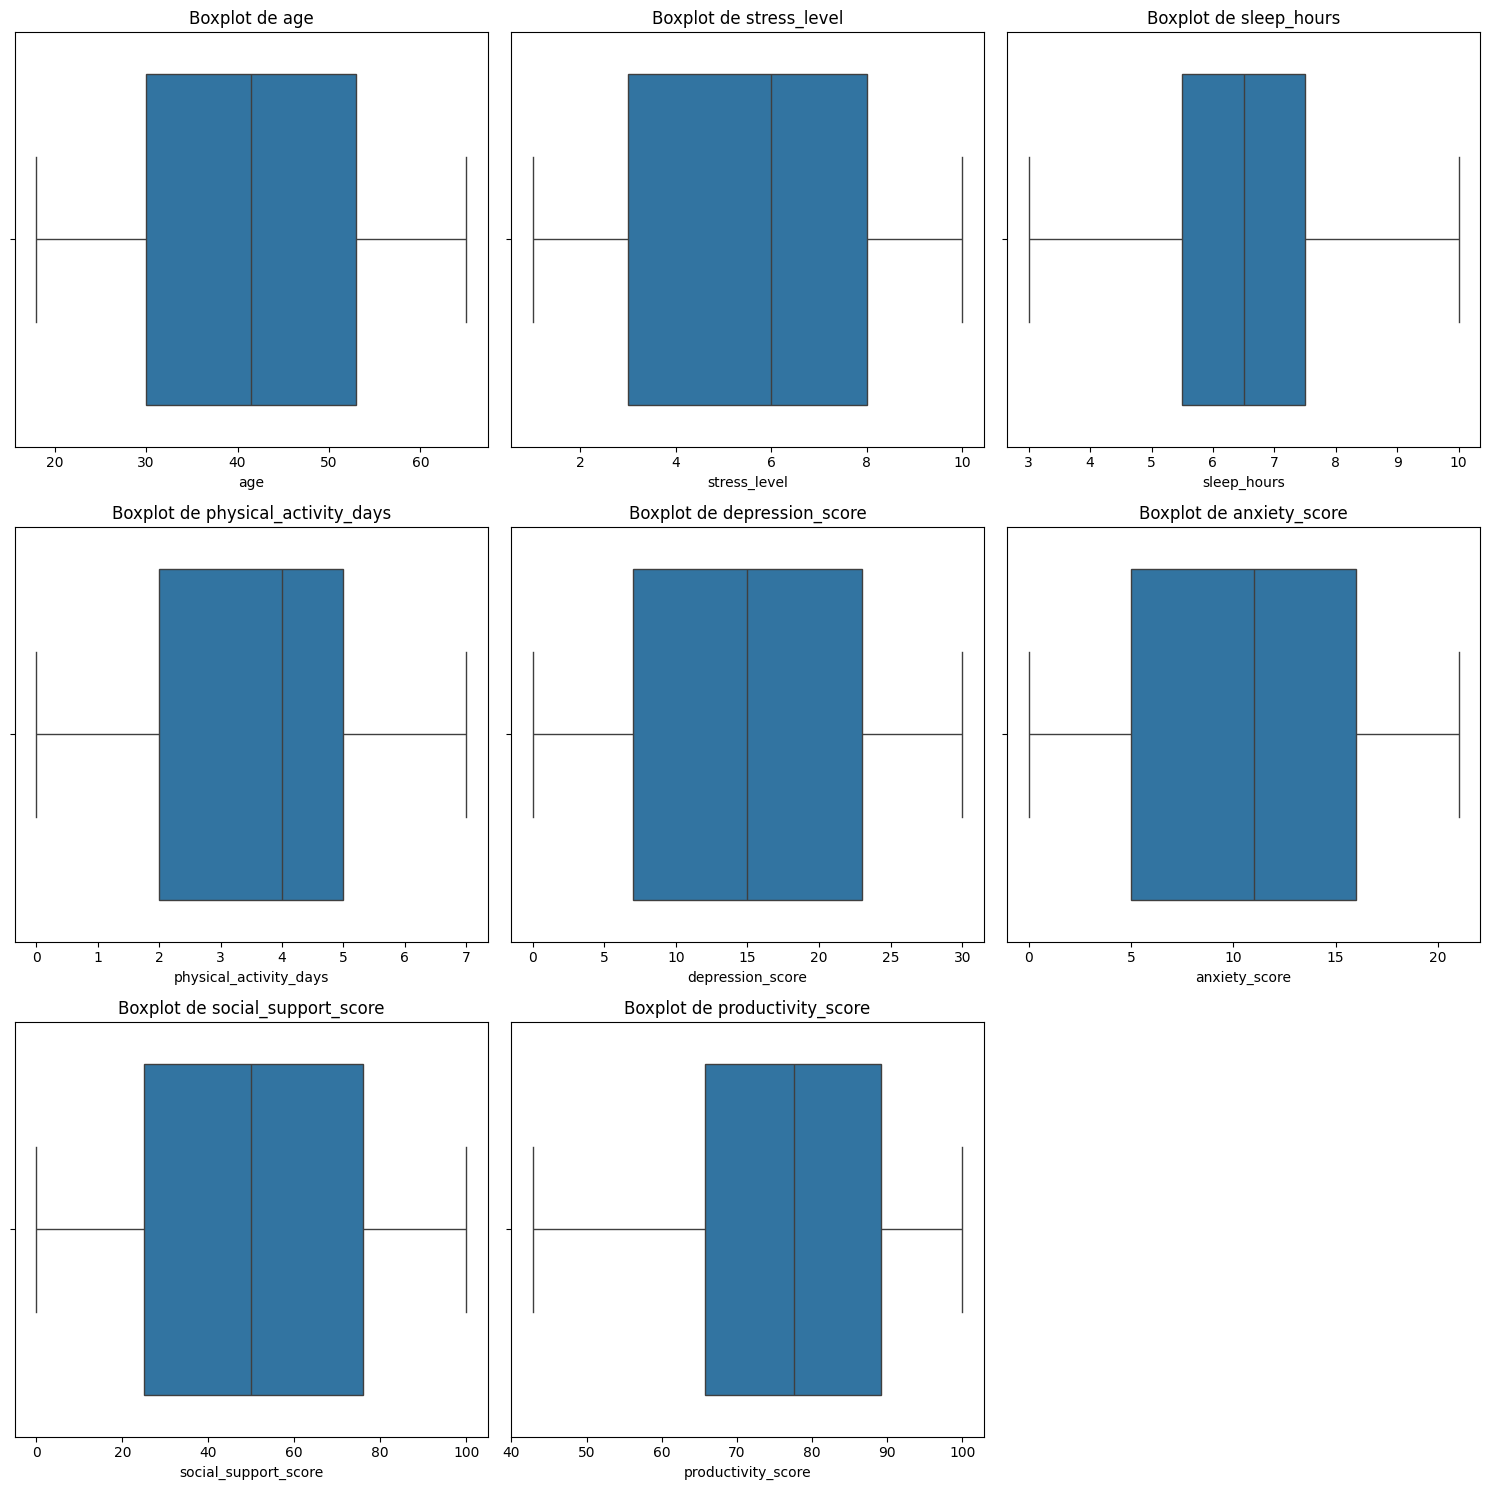

In [ ]:
visualizar_boxplots(df)

In [ ]:
def mostrar_qqplots(df):
    """
    Genera QQ-plots para verificar la normalidad de las variables numéricas.
    """
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        plt.figure()
        stats.probplot(df[col].dropna(), dist="norm", plot=plt)
        plt.title(f'QQ-plot para {col}')
        plt.show()

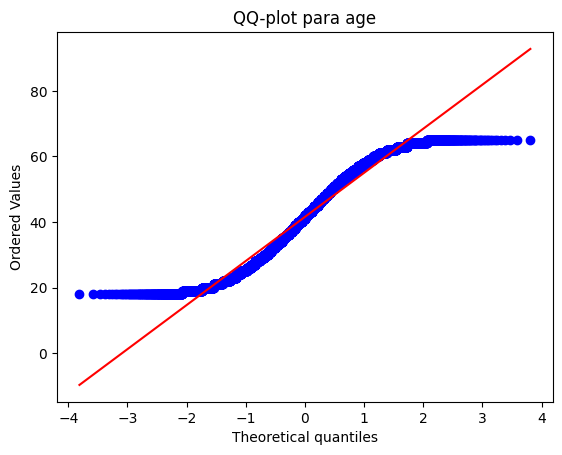

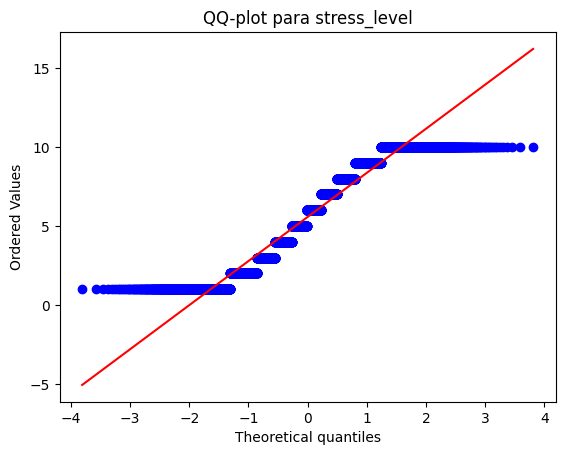

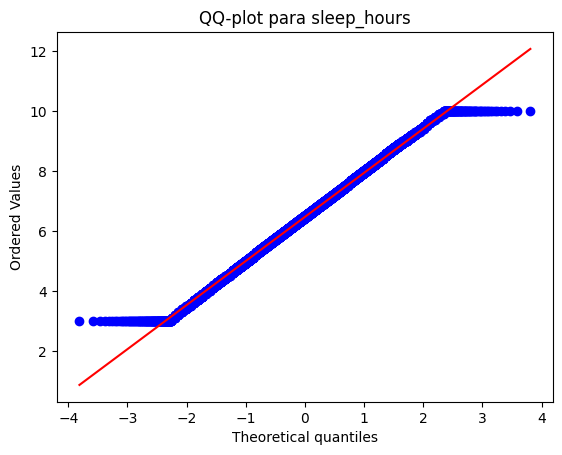

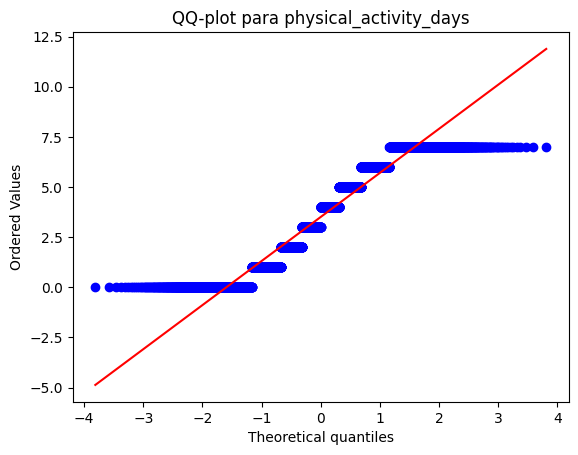

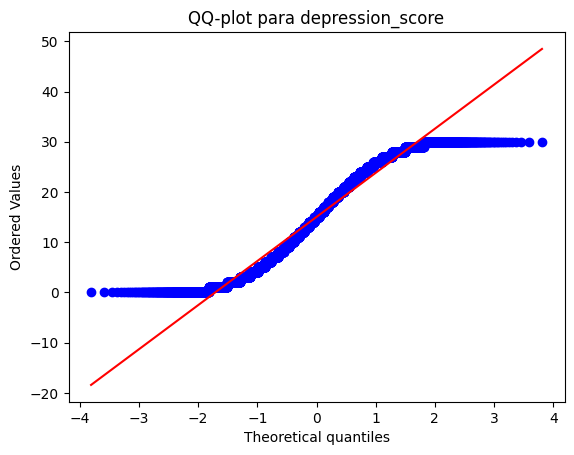

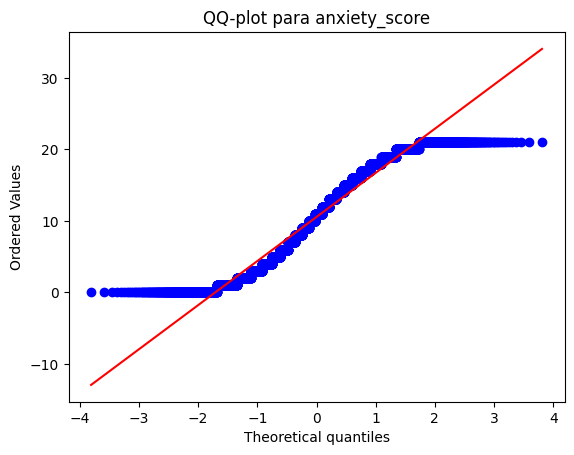

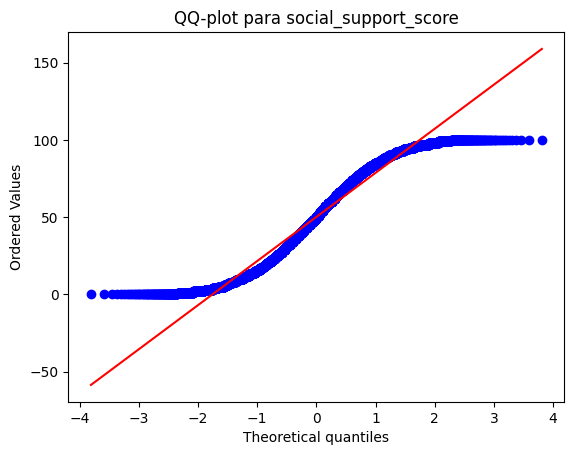

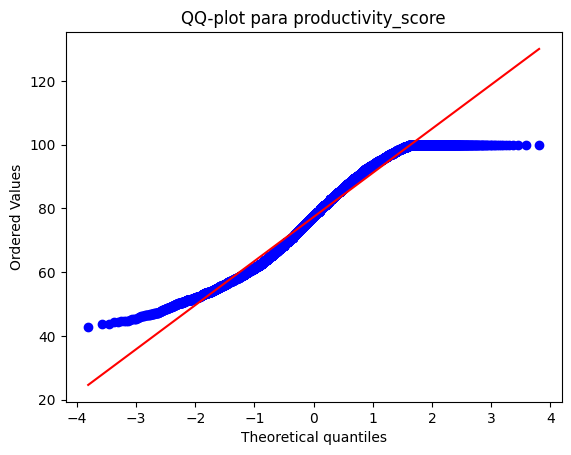

In [ ]:
mostrar_qqplots(df)

### 7.1.3 Matriz de correlación

In [ ]:
def correlacion(df):
    """
    Calcula y visualiza la matriz de correlación entre variables numéricas.
    """
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    corr_matrix = df[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
    plt.title('Matriz de Correlación')
    plt.show()

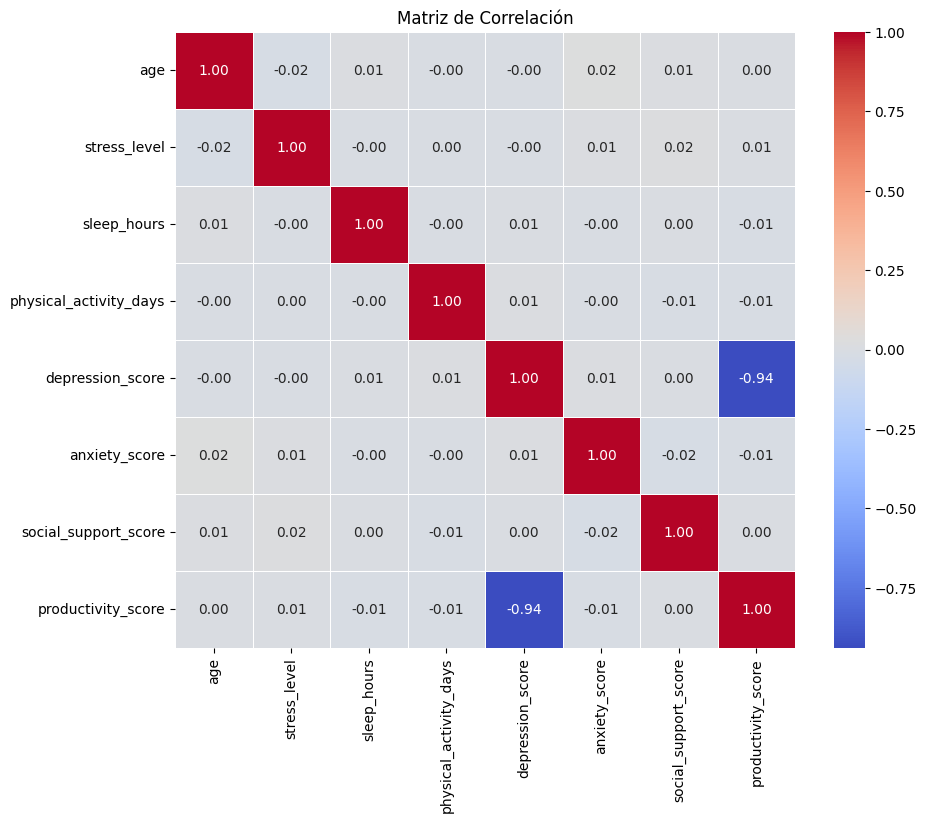

In [ ]:
correlacion(df)

## 7.2 Variables Categoricas

### 7.2.1 Resumen de las variables categoricas

In [ ]:
def resumen_variables_categoricas(df):
    """
    Imprime el número de categorías únicas y las 10 más frecuentes de cada variable categórica.
    """
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    for col in cat_cols:
        print(f"\nVariable: {col}")
        print(f"Categorías únicas: {df[col].nunique()}")
        print(df[col].value_counts().head(10))

In [ ]:
resumen_variables_categoricas(df)


Variable: gender
Categorías únicas: 4
gender
Male                 4557
Female               4457
Non-binary            520
Prefer not to say     466
Name: count, dtype: int64

Variable: employment_status
Categorías únicas: 4
employment_status
Employed         5868
Student          2043
Self-employed    1045
Unemployed       1044
Name: count, dtype: int64

Variable: work_environment
Categorías únicas: 3
work_environment
On-site    5044
Remote     3009
Hybrid     1947
Name: count, dtype: int64

Variable: mental_health_history
Categorías únicas: 2
mental_health_history
No     6969
Yes    3031
Name: count, dtype: int64

Variable: seeks_treatment
Categorías únicas: 2
seeks_treatment
No     6012
Yes    3988
Name: count, dtype: int64

Variable: mental_health_risk
Categorías únicas: 3
mental_health_risk
Medium    5892
High      2369
Low       1739
Name: count, dtype: int64


### 6.2.2 Comportamiento de las variables categoricas

In [ ]:
def visualizar_variables_categoricas(df):
    """
    Muestra gráficos de barras para todas las variables categóricas.
    """
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    num_cols = len(cat_cols)
    cols = 3
    rows = (num_cols // cols) + (num_cols % cols > 0)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    axes = axes.flatten()
    for i, col in enumerate(cat_cols):
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', rotation=45)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

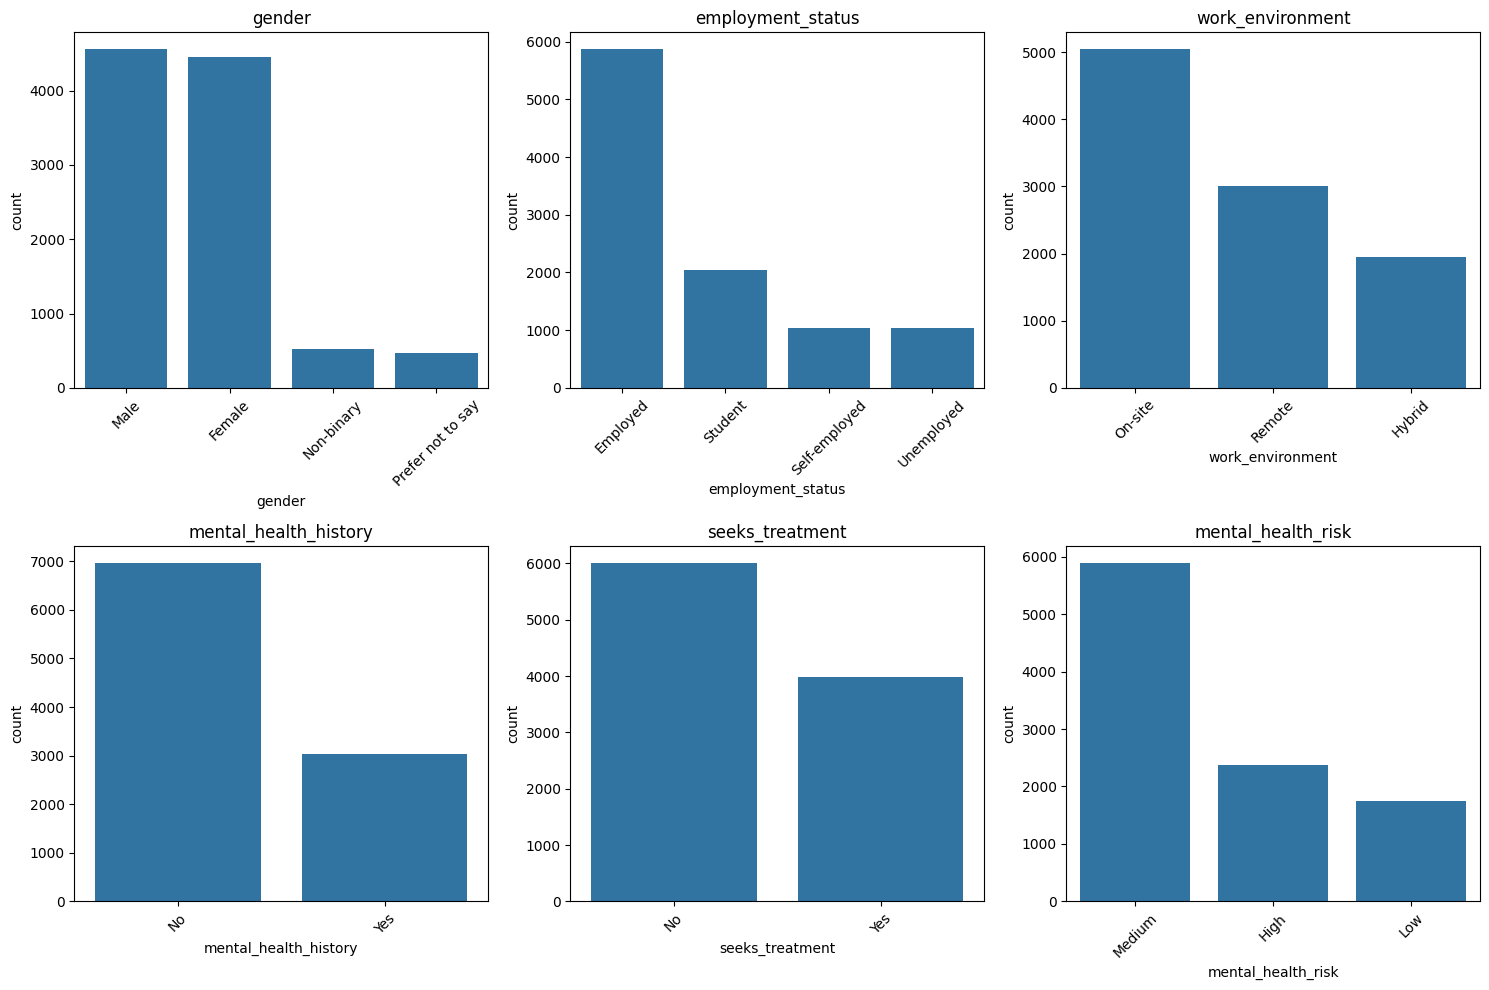

In [ ]:
visualizar_variables_categoricas(df)

### 6.2.3 Comportamiento de las variables categoricas vs variable objetivo

In [ ]:
def graficar_categoricas_vs_objetivo(df, var_objetivo):
    """
    Genera countplots para cada variable categórica contra la variable objetivo.
    """
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, hue=var_objetivo, order=df[col].value_counts().index)
        plt.title(f"{col} vs {var_objetivo}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

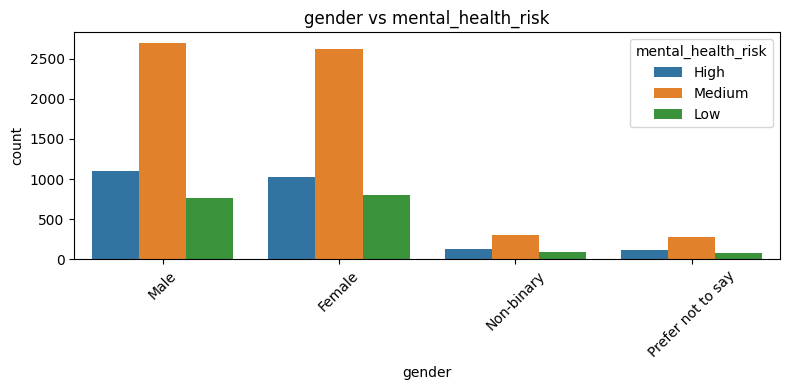

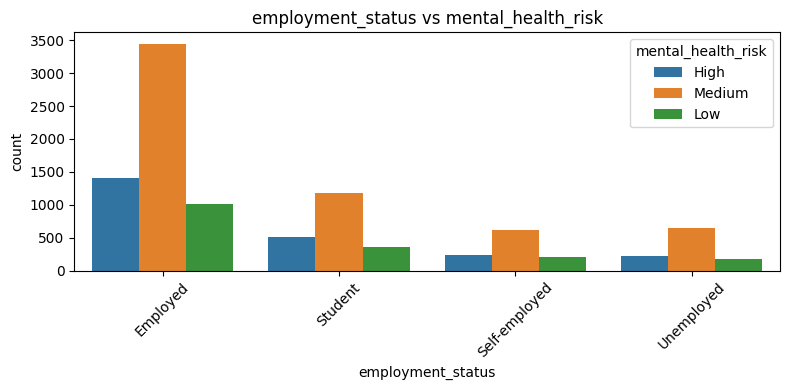

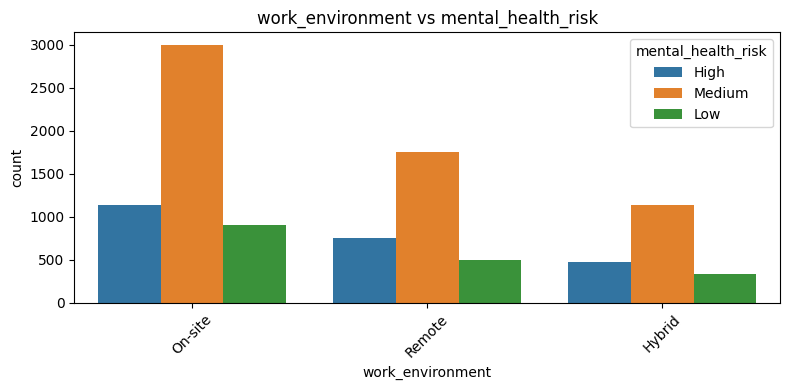

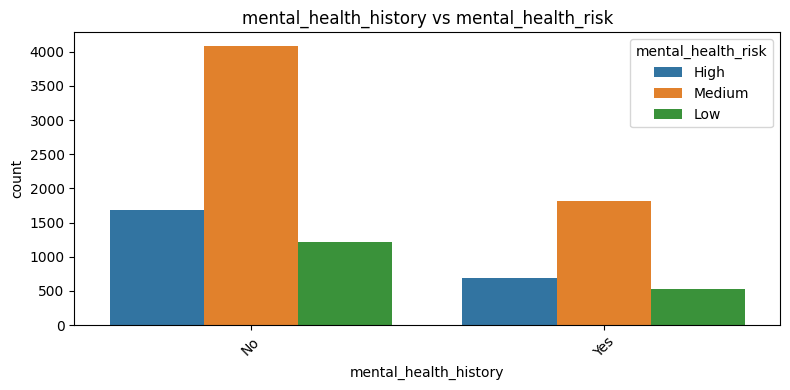

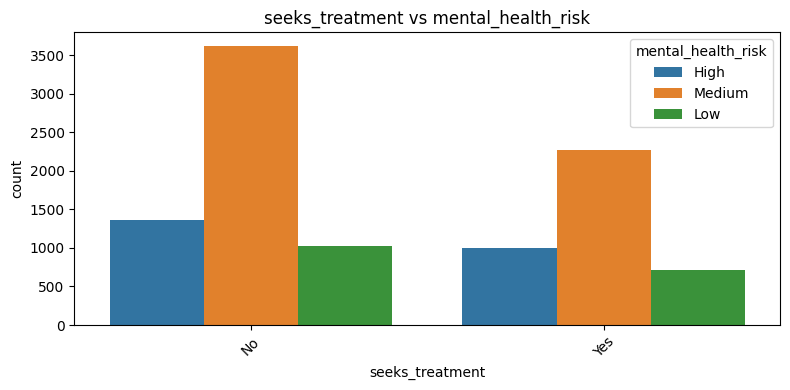

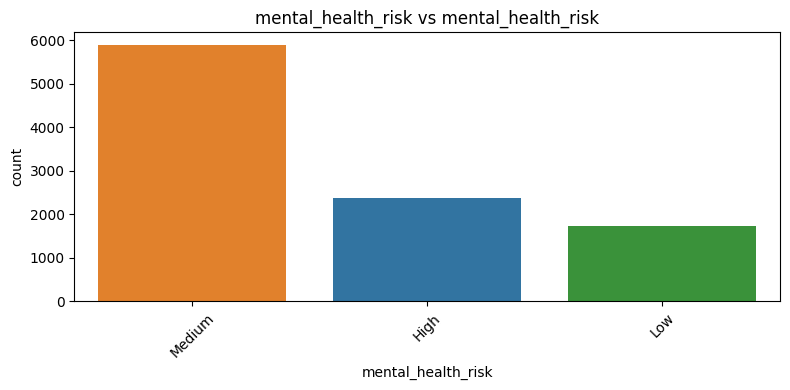

In [ ]:
graficar_categoricas_vs_objetivo(df, 'mental_health_risk')

### 6.2.4 Tabla de frecuencias cruzada

In [ ]:
def tabla_frecuencia_cruzada(df, var_cat, var_objetivo):
    """
    Imprime tabla cruzada normalizada entre una variable categórica y la objetivo.
    """
    print(pd.crosstab(df[var_cat], df[var_objetivo], normalize='index'))

In [ ]:
tabla_frecuencia_cruzada(df, 'gender', 'mental_health_risk')

mental_health_risk      High       Low    Medium
gender                                          
Female              0.231322  0.179717  0.588961
Male                0.240509  0.168312  0.591178
Non-binary          0.250000  0.176923  0.573077
Prefer not to say   0.240343  0.169528  0.590129
